# Quanitfying Shakespeare

In this notebook you will:

1. Read all of Shakespeare's works into a list of strings
2. Count the frequency of letters used
3. Visualize the results of the frequencies

The dataset will come from: <https://bit.ly/shakespeare-txt>

In [1]:
# Read the lines into a list

from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read every line form filename into a list"""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        line = line.lower()
        line = line.strip()
        lines.append(line)
    file_handle.close()
    return lines

shakespeare_lines: list[str] = read_lines("./shakespeare.txt")
print(len(shakespeare_lines))

622275


In [4]:
# Tally up characters

# Goal: define function and tally 
# You are given two paramerers
# 1: reference to dictionary whose keys are str are str and values are int
# 2: A str that refers to a key in the dictionary you are tallying
# Logic:
# If the str / key is in the dictionary, increase its value by one.
# Otherwise, set that key's value to 1 in the dict
# THis function returns nothing

def tally(counts: dict[str, int], key: str) -> None:
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

    return None

def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequencies of all letters in lines."""
    counts: dict[str, int] = {}
    # For each line in lines, 
    # loop through each charater in the line
    # Tally that character into counts using your tally function
    # Challenge: only tally a - z characters
    for line in lines:
        for char in line:
            if char >= "a" and char <= "z":
            # OR if char.isalpha():
                tally(counts, char)
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 1648875, 'h': 1184340, 'i': 1269950, 's': 1244945, 'e': 2236020, 'x': 26470, 'f': 402580, 'l': 850095, 'p': 292320, 'r': 1189320, 'n': 1216310, 'd': 747310, 'b': 309780, 'y': 471850, 'o': 1573000, 'j': 23895, 'c': 440925, 'g': 340995, 'u': 644735, 'a': 1445750, 'w': 446950, 'm': 557260, 'k': 177040, 'v': 187845, 'z': 8155, 'q': 17910}


In [12]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
shakespeare_letters_sorted: dict[str, int] = dict(items_in_dict)
print(shakespeare_letters_sorted)

{'a': 1445750, 'b': 309780, 'c': 440925, 'd': 747310, 'e': 2236020, 'f': 402580, 'g': 340995, 'h': 1184340, 'i': 1269950, 'j': 23895, 'k': 177040, 'l': 850095, 'm': 557260, 'n': 1216310, 'o': 1573000, 'p': 292320, 'q': 17910, 'r': 1189320, 's': 1244945, 't': 1648875, 'u': 644735, 'v': 187845, 'w': 446950, 'x': 26470, 'y': 471850, 'z': 8155}


<BarContainer object of 26 artists>

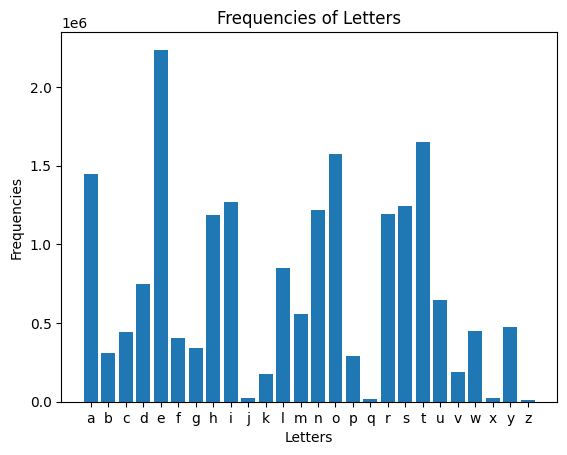

In [11]:
# Make a bar chart

from matplotlib import pyplot

pyplot.title("Frequencies of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(shakespeare_letters_sorted.keys())
values: list[int] = list(shakespeare_letters_sorted.values())
pyplot.bar(labels, values)